In [64]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
from concurrent.futures import ThreadPoolExecutor
import os
import glob
import re
from tqdm import tqdm
import imageio

import matplotlib.animation as animation

In [37]:

files=glob.glob("./*root")


sorted_files = sorted(files, key=lambda x: int(re.search(r'\d+', x).group()))


In [38]:
dump=[]
labels=[]
for file in sorted_files:
    labels.append(file)
    workers=8

    decompression_executor = ThreadPoolExecutor(max_workers=workers)
    interpretation_executor = ThreadPoolExecutor(max_workers=workers)


    with uproot.open(file) as file:
        tree = file['B4;1']
        braunches=['Edep']
        dump.append(tree.arrays( braunches,library="np", 
            decompression_executor=decompression_executor, 
            interpretation_executor=interpretation_executor)['Edep'])

    
    

50it [00:23,  2.12it/s]


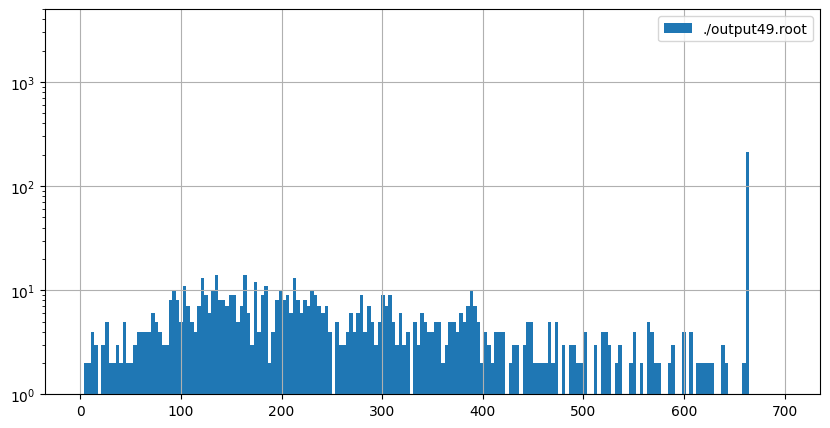

In [59]:
num=0
for i,j in tqdm(zip(dump,labels)):
    
    plt.close()
    plt.figure(figsize=(10,5))
    plt.grid(True)
    plt.hist(i,bins=np.linspace(0,700,200),label=j)
    plt.legend()
    
    plt.yscale('log')
    plt.ylim(1,5.e3)
    plt.savefig('../images/{}.png'.format(num))
    
    num=num+1

In [61]:
files=glob.glob("../images/*.png")


sorted_files = sorted(files, key=lambda x: int(re.search(r'\d+', x).group()))


In [62]:
sorted_files

['../images/0.png',
 '../images/1.png',
 '../images/2.png',
 '../images/3.png',
 '../images/4.png',
 '../images/5.png',
 '../images/6.png',
 '../images/7.png',
 '../images/8.png',
 '../images/9.png',
 '../images/10.png',
 '../images/11.png',
 '../images/12.png',
 '../images/13.png',
 '../images/14.png',
 '../images/15.png',
 '../images/16.png',
 '../images/17.png',
 '../images/18.png',
 '../images/19.png',
 '../images/20.png',
 '../images/21.png',
 '../images/22.png',
 '../images/23.png',
 '../images/24.png',
 '../images/25.png',
 '../images/26.png',
 '../images/27.png',
 '../images/28.png',
 '../images/29.png',
 '../images/30.png',
 '../images/31.png',
 '../images/32.png',
 '../images/33.png',
 '../images/34.png',
 '../images/35.png',
 '../images/36.png',
 '../images/37.png',
 '../images/38.png',
 '../images/39.png',
 '../images/40.png',
 '../images/41.png',
 '../images/42.png',
 '../images/43.png',
 '../images/44.png',
 '../images/45.png',
 '../images/46.png',
 '../images/47.png',
 '

In [65]:
with imageio.get_writer('animated_plot.gif', mode='I', duration=0.1) as writer:
    for filename in sorted_files:
        image = imageio.imread(filename)
        writer.append_data(image)

/tmp/ipykernel_92877/3343610531.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
